# Proyecto Final

## Notebook No. 1 Exploracion de datos

#### Información sobre: Las importaciones de Plaguicidas, en el país de Guatemala

##### Datos Históricos  correspondientes a los años 2018 y 2019

###### Importacion de Librerias 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

#### Cargamos los datos de entrada

In [2]:
datas= pd.ExcelFile('BD_Importaciones.xlsx')
print(datas.sheet_names)

['hoja1']


In [3]:
dataset = datas.parse('hoja1')


In [4]:
dataset.head()

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,CIF_US$,CIF_Q,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.
0,Guatemala,2018,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,...,6659.6,51611.90,27.748333,2018-11-30,noviembre,Agricenter,Agricenter S.R.L.,135.0,Líquido,386-18
1,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,48000.0,355968.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,486.0,Líquido,2-18
2,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,30000.0,222480.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,353.0,Líquido,3-18
3,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,706.0,5299.17,3.530000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",30.0,Líquido,1869-18
4,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,6561.0,49246.28,3.240000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",130.0,Líquido,1870-18


### Eplorando las variables estadisticamente 

In [5]:
dataset.describe()

,Año,Cantidad,CIF_US$,CIF_Q,Precio,Timbres
count,6425.000000,6.425000e+03,6.425000e+03,6.425000e+03,6425.000000,6425.000000
mean,2018.344125,7.958204e+03,5.427410e+04,4.102917e+05,66.882016,410.112022
std,0.475119,5.322214e+04,1.146783e+05,8.663857e+05,407.544205,594.623007
min,2018.000000,2.000000e-02,5.000000e-01,3.670000e+00,0.002000,1.000000
25%,2018.000000,3.000000e+02,6.218100e+03,4.720111e+04,4.347211,125.000000
50%,2018.000000,1.200000e+03,2.016000e+04,1.526966e+05,13.790000,281.000000
75%,2019.000000,7.846000e+03,5.490000e+04,4.134922e+05,36.500000,542.000000
max,2019.000000,3.657984e+06,2.000000e+06,1.496590e+07,26128.000000,35680.000000


###### Registros núemricos son: Cantidad, CIF_US$, CIF_Q, Precio, Timbres,  la columna de timbres, es un valor de registro de importación, por tal razon, descartamos el uso de la variable de tiempres. 

#### Procedemos con una visualización gráfica de los datos

In [6]:

# Visualizamos rápidamente las caraterísticas de entrada


In [7]:
valores = dataset[["Año", "Clase", "I.A.", "Cantidad", "CIF_US$", "Precio"]]
print(valores)

       Año      Clase               I.A.  Cantidad   CIF_US$     Precio
0     2018  Herbicida            Dicamba     240.0   6659.60  27.748333
1     2018  Herbicida              2,4-D   16000.0  48000.00   3.000000
2     2018  Herbicida              2,4-D   10000.0  30000.00   3.000000
3     2018  Herbicida              2,4-D     200.0    706.00   3.530000
4     2018  Herbicida              2,4-D    2025.0   6561.00   3.240000
...    ...        ...                ...       ...       ...        ...
6420  2018  Herbicida  Paraquat + Diuron    2304.0   9208.86   3.996901
6421  2019  Herbicida  Paraquat + Diuron    7920.0  49104.00   6.200000
6422  2019  Herbicida  Paraquat + Diuron    5280.0  17390.40   3.293636
6423  2019  Herbicida  Paraquat + Diuron    7260.0  23701.80   3.264711
6424  2019  Herbicida  Paraquat + Diuron    5280.0  17558.40   3.325455

[6425 rows x 6 columns]


<AxesSubplot:xlabel='Año'>

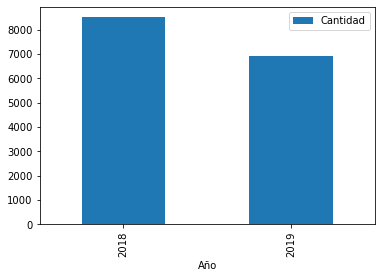

In [8]:
df= pd.DataFrame(valores)
df.groupby('Año')['Cantidad'].mean().plot (kind = 'bar', legend ='Importaciones')


###### Visualización del promedio de plaguicidas importados, correspondientes al año 2018 y 2019

<AxesSubplot:xlabel='CIF_US$', ylabel='Cantidad'>

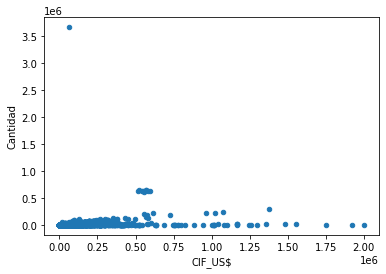

In [9]:
# visualización de  la variable Cantidad de producto importado, respectivamente a su valor de importación 
df.plot.scatter(y= "Cantidad", x= "CIF_US$")

<AxesSubplot:xlabel='Año', ylabel='Cantidad'>

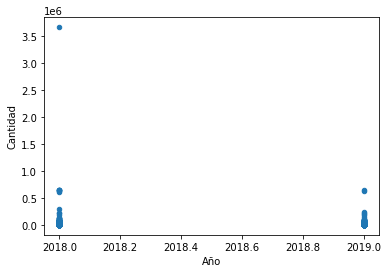

In [10]:
df.plot.scatter(y= "Cantidad", x= "Año")

<AxesSubplot:xlabel='CIF_US$', ylabel='Precio'>

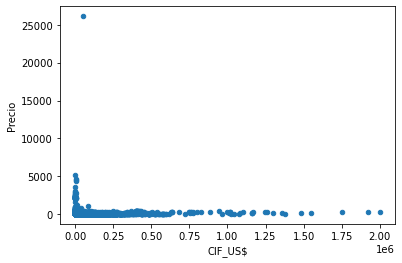

In [11]:
df.plot.scatter(y= "Precio", x= "CIF_US$")

In [12]:
# verificamos la cantidad de registros por clase de producto importado
df.Clase.value_counts()

Fungicida                   2239
Insecticida                 1647
Herbicida                   1500
Coadyuvante                  240
Regulador de crecimiento     142
Fumigante                    123
Nematicida                   108
Tratador de semilla           91
Otro                          84
Regulador de Crecimiento      83
Acondicionador de pH          58
Bactericida                   40
Rodenticida                   18
ND                            15
Molusquicida                  12
Hormiguicida                  11
Feromona                       9
molusquicida                   3
fungicida                      2
Name: Clase, dtype: int64

<AxesSubplot:ylabel='Clase'>

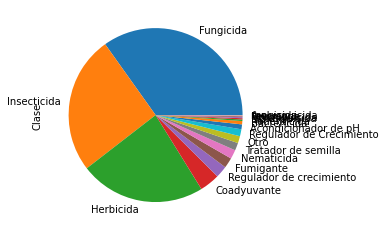

In [13]:
serie= df.Clase.value_counts()
serie.plot.pie()

<AxesSubplot:>

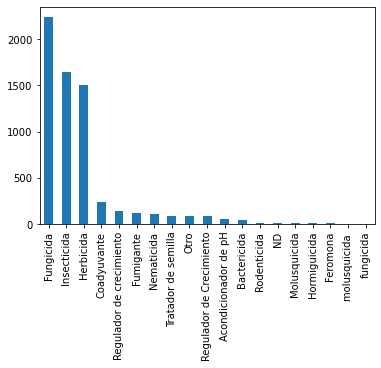

In [14]:
serie.plot.bar()

<AxesSubplot:>

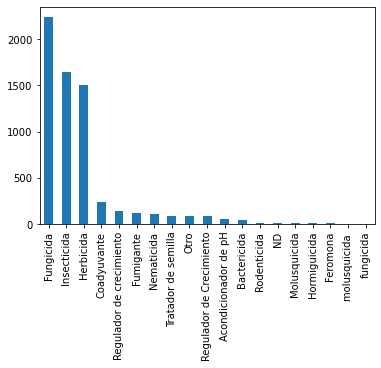

In [15]:
serie.plot.bar()

In [16]:
# Visualizamos las importaciones  de todos los herbicidas importados
Filter_ValoresH = valores[(valores['Clase']== 'Herbicida') & (valores['Cantidad'])]
print(Filter_ValoresH)

       Año      Clase               I.A.  Cantidad   CIF_US$     Precio
0     2018  Herbicida            Dicamba     240.0   6659.60  27.748333
1     2018  Herbicida              2,4-D   16000.0  48000.00   3.000000
2     2018  Herbicida              2,4-D   10000.0  30000.00   3.000000
3     2018  Herbicida              2,4-D     200.0    706.00   3.530000
4     2018  Herbicida              2,4-D    2025.0   6561.00   3.240000
...    ...        ...                ...       ...       ...        ...
6420  2018  Herbicida  Paraquat + Diuron    2304.0   9208.86   3.996901
6421  2019  Herbicida  Paraquat + Diuron    7920.0  49104.00   6.200000
6422  2019  Herbicida  Paraquat + Diuron    5280.0  17390.40   3.293636
6423  2019  Herbicida  Paraquat + Diuron    7260.0  23701.80   3.264711
6424  2019  Herbicida  Paraquat + Diuron    5280.0  17558.40   3.325455

[1500 rows x 6 columns]


<AxesSubplot:xlabel='Año'>

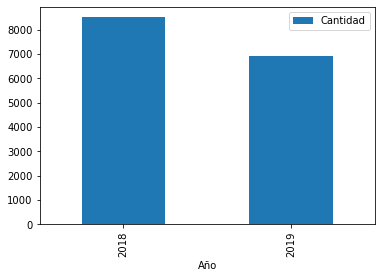

In [17]:
# Promedio de Herbicidas importados
dH= pd.DataFrame(Filter_ValoresH)
df.groupby('Año')['Cantidad'].mean().plot (kind = 'bar', legend ='Importaciones')

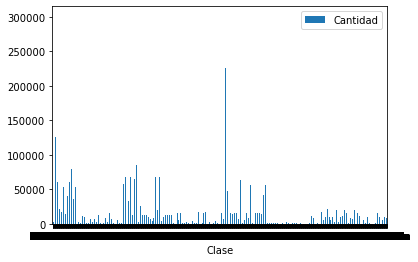

In [18]:
H = Filter_ValoresH.plot.bar(x= "Clase", y= "Cantidad", rot = 0)
plt.show()

In [19]:
Filter_ValoresH.describe ()


,Año,Cantidad,CIF_US$,Precio
count,1500.000000,1500.000000,1.500000e+03,1500.000000
mean,2018.336000,13787.364233,6.768871e+04,20.697813
std,0.472496,23487.064754,1.004583e+05,57.176725
min,2018.000000,0.200000,5.000000e-01,0.002000
25%,2018.000000,1000.000000,1.249969e+04,3.465922
50%,2018.000000,5940.000000,3.609600e+04,5.150737
75%,2019.000000,15455.000000,7.755000e+04,11.022500
max,2019.000000,300000.000000,1.380000e+06,943.300000


C:\Users\Usuario\AppData\Local\Temp/ipykernel_5592/1872752047.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Filter_ValoresH.drop(['Clase'],1).hist()


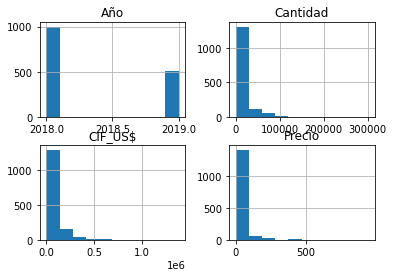

In [20]:
# Visualizamos rápidamente las caraterísticas de entrada
Filter_ValoresH.drop(['Clase'],1).hist()
plt.show()

In [21]:
Filter_ValoresH.describe()

,Año,Cantidad,CIF_US$,Precio
count,1500.000000,1500.000000,1.500000e+03,1500.000000
mean,2018.336000,13787.364233,6.768871e+04,20.697813
std,0.472496,23487.064754,1.004583e+05,57.176725
min,2018.000000,0.200000,5.000000e-01,0.002000
25%,2018.000000,1000.000000,1.249969e+04,3.465922
50%,2018.000000,5940.000000,3.609600e+04,5.150737
75%,2019.000000,15455.000000,7.755000e+04,11.022500
max,2019.000000,300000.000000,1.380000e+06,943.300000


###### Con respecto a Las importaciones de los herbicidas, reportados en los ultimos dos años, se puede observar que el promedio de kilolitros  es de 13,787,   de los dos años el volumen máximo fue de 300,000 Kilolitros de todos los productos herbicidas. 

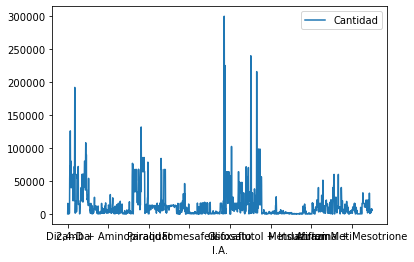

In [22]:
# I.A.  = Ingrediente activo del producto importado
H = Filter_ValoresH.plot.line(x= "I.A.", y= "Cantidad", rot = 0)
plt.show()

In [23]:
# visualizamos los  Fungicidas  importados 
Filter_ValoresF = valores[(valores['Clase']== 'Fungicida') & (valores['Cantidad'])]
print(Filter_ValoresF)

       Año      Clase                          I.A.  Cantidad     CIF_US$  \
309   2018  Fungicida                  Fluopicolida     500.0   137500.00   
310   2018  Fungicida                  Fluopicolida    3000.0   825000.00   
311   2018  Fungicida                  Fluopicolida    7000.0  1925000.00   
312   2018  Fungicida                  Fluopicolida    4000.0  1100000.00   
313   2018  Fungicida                  Fluopicolida    1000.0   275000.00   
...    ...        ...                           ...       ...         ...   
6335  2018  Fungicida     Tebuconazol + Triadimenol       9.5      323.29   
6336  2019  Fungicida  Difenoconazol + Propiconazol      84.0     1667.35   
6337  2019  Fungicida  Difenoconazol + Propiconazol     672.0    11017.80   
6338  2019  Fungicida    Propiconazol + Difeconazol     180.0     3009.37   
6339  2019  Fungicida     Tebuconazol + Triadimenol       9.5      323.29   

          Precio  
309   275.000000  
310   275.000000  
311   275.000000  

<AxesSubplot:xlabel='Año'>

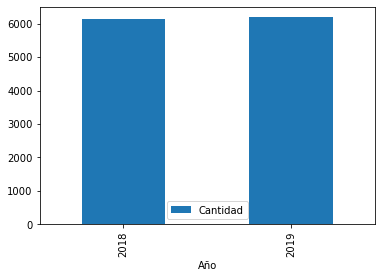

In [24]:
dff= pd.DataFrame(Filter_ValoresF)
dff.groupby('Año')['Cantidad'].mean().plot (kind = 'bar', legend ='Importaciones')

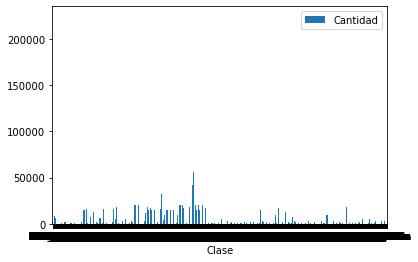

In [25]:
F = Filter_ValoresF.plot.bar(x= "Clase", y= "Cantidad", rot = 0)
plt.show()

C:\Users\Usuario\AppData\Local\Temp/ipykernel_5592/2860647054.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Filter_ValoresF.drop(['Clase'],1).hist()


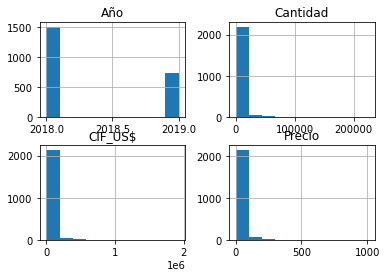

In [26]:
Filter_ValoresF.drop(['Clase'],1).hist()
plt.show()

In [27]:
Filter_ValoresF.describe()

,Año,Cantidad,CIF_US$,Precio
count,2239.000000,2239.000000,2.239000e+03,2239.000000
mean,2018.329165,6153.645543,5.606444e+04,26.916859
std,0.470015,11316.602363,1.254657e+05,45.690310
min,2018.000000,0.500000,5.000000e-01,0.002000
25%,2018.000000,409.000000,8.713780e+03,4.300000
50%,2018.000000,1500.000000,2.425540e+04,15.541111
75%,2019.000000,10000.000000,5.907625e+04,29.578132
max,2019.000000,224000.000000,1.925000e+06,1005.400000


###### Con respecto a las estadisticas de los Fungicidas importados, se observa que el promedio de importacion, de  dos ñaos de historia, es  de 6,153 kilolitros importados de varios productos, en los ultimos dos años se han importados 224,000 kilolitros de producto

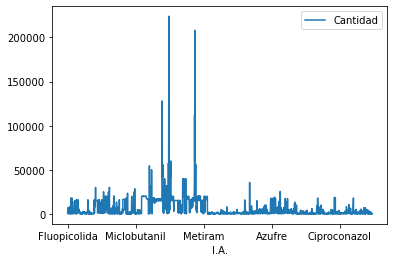

In [28]:
F = Filter_ValoresF.plot.line(x= "I.A.", y= "Cantidad", rot = 0)
plt.show()

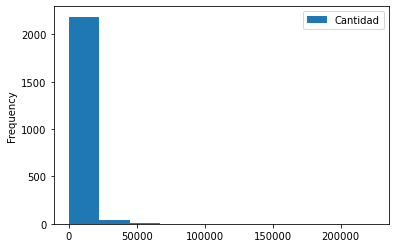

In [29]:
F = Filter_ValoresF.plot.hist(x= "Clase", y= "Cantidad", rot = 0)
plt.show()

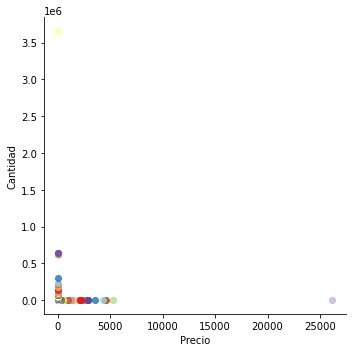

In [30]:
sbn.lmplot(x ='Precio',y = 'Cantidad', data=df, fit_reg = False, hue='Cantidad', legend = False, palette ='Paired'  )

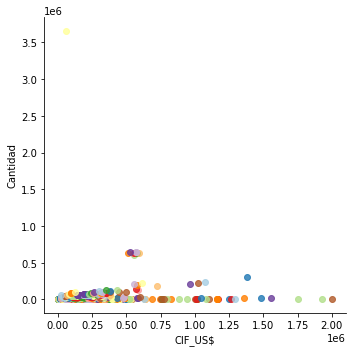

In [31]:
sbn.lmplot(x ='CIF_US$',y = 'Cantidad', data=df, fit_reg = False, hue='Cantidad', legend = False, palette ='Paired'  )

<AxesSubplot:xlabel='CIF_US$', ylabel='Precio'>

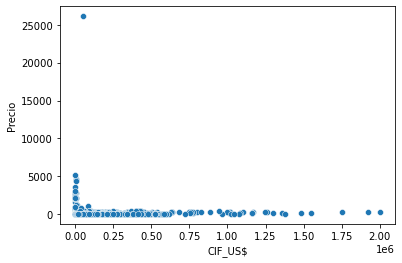

In [32]:
sbn.scatterplot(data= df, x ='CIF_US$',y = 'Precio' )

<AxesSubplot:xlabel='Precio', ylabel='Cantidad'>

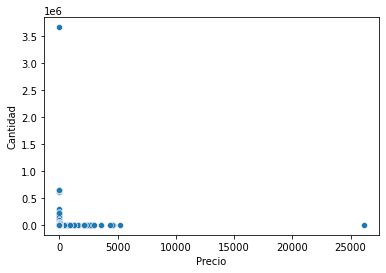

In [33]:
sbn.scatterplot(data= df, x ='Precio',y = 'Cantidad' )

<AxesSubplot:xlabel='Precio', ylabel='Cantidad'>

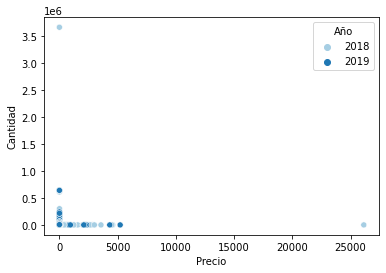

In [34]:
sbn.scatterplot(data= df, x ='Precio',y = 'Cantidad', hue='Año', palette ='Paired')

<AxesSubplot:xlabel='Precio', ylabel='Cantidad'>

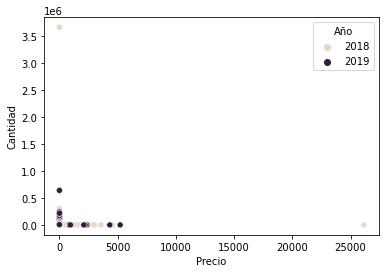

In [35]:
sbn.scatterplot(data= df,x ='Precio',y = 'Cantidad', hue='Año')

######  con la explración del datase, las variables con las que podemos trabajar, Cantidad, Valor Cif$,  y por la Clase del producto. 